In [1]:
#import necessary libraries:
import numpy as np
import pandas as pd

In [2]:
import seaborn as sns                   
import matplotlib.pyplot as plt
%matplotlib inline 

In [3]:
#Ignore any warnings 
import warnings  
warnings.filterwarnings("ignore")

In [49]:
import os
import plotly.express as px
import plotly.io as pio

In [52]:
import statsmodels.api as sm
%pip install kaleido
import kaleido
from sklearn.preprocessing import StandardScaler,PowerTransformer
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans, MeanShift, estimate_bandwidth
from sklearn.datasets import make_blobs
from collections import Counter
from sklearn.model_selection import cross_validate,train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn import metrics
from sklearn.metrics import r2_score,silhouette_score,confusion_matrix,accuracy_score
pd.set_option("display.precision",3)
np.set_printoptions(precision=5, suppress=True)
pd.options.display.float_format = '{:.4f}'.format

Note: you may need to restart the kernel to use updated packages.


In [ ]:
from sklearn.cluster import KMeans
!conda install -c districtdatalabs yellowbrick
from yellowbrick.cluster import KElbowVisualizer

In [50]:
#reading the data:
electriccardataEV=pd.read_csv("electriccardataEVproject.csv")

In [6]:
electriccardataEV

Brand                            Model  AccelSec  TopSpeed_KmH  \
0         Tesla    Model 3 Long Range Dual Motor       4.6           233   
1    Volkswagen                        ID.3 Pure      10.0           160   
2      Polestar                                2       4.7           210   
3           BMW                              iX3       6.8           180   
4         Honda                                e       9.5           145   
..          ...                              ...       ...           ...   
97       Nissan                      Ariya 63kWh       7.5           160   
98         Audi    e-tron S Sportback 55 quattro       4.5           210   
99       Nissan              Ariya e-4ORCE 63kWh       5.9           200   
100      Nissan  Ariya e-4ORCE 87kWh Performance       5.1           200   
101       Byton                M-Byte 95 kWh 2WD       7.5           190   

     Range_Km  Battery_Pack Kwh  Efficiency_WhKm  FastCharge_KmH RapidCharge  \
0         460              70.0              161             940         Yes   
1         270              45.0              167             250         Yes   
2         400              75.0              181             620         Yes   
3         360              74.0              206             560         Yes   
4         170              28.5              168             190         Yes   
..        ...               ...              ...             ...         ...   
97        330              63.0              191             440         Yes   
98        335              86.5              258             540         Yes   
99        325              63.0              194             440         Yes   
100       375              87.0              232             450         Yes   
101       400              95.0              238             480         Yes   

    PowerTrain    PlugType  BodyStyle Segment  Seats  PriceEuro          INR  
0          AWD  Type 2 CCS      Sedan       D      5      55480  4540988.068  
1          RWD  Type 2 CCS  Hatchback       C      5      30000  2455473.000  
2          AWD  Type 2 CCS   Liftback       D      5      56440  4619563.204  
3          RWD  Type 2 CCS        SUV       D      5      68040  5569012.764  
4          RWD  Type 2 CCS  Hatchback       B      4      32997  2700774.753  
..         ...         ...        ...     ...    ...        ...          ...  
97         FWD  Type 2 CCS  Hatchback       C      5      45000  3683209.500  
98         AWD  Type 2 CCS        SUV       E      5      96050  7861606.055  
99         AWD  Type 2 CCS  Hatchback       C      5      50000  4092455.000  
100        AWD  Type 2 CCS  Hatchback       C      5      65000  5320191.500  
101        AWD  Type 2 CCS        SUV       E      5      62000  5074644.200  

[102 rows x 16 columns]

In [7]:
electriccardataEV.columns

Index(['Brand', 'Model', 'AccelSec', 'TopSpeed_KmH', 'Range_Km',
       'Battery_Pack Kwh', 'Efficiency_WhKm', 'FastCharge_KmH', 'RapidCharge',
       'PowerTrain', 'PlugType', 'BodyStyle', 'Segment', 'Seats', 'PriceEuro',
       'INR'],
      dtype='object')

In [8]:
electriccardataEV.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Brand             102 non-null    object 
 1   Model             102 non-null    object 
 2   AccelSec          102 non-null    float64
 3   TopSpeed_KmH      102 non-null    int64  
 4   Range_Km          102 non-null    int64  
 5   Battery_Pack Kwh  102 non-null    float64
 6   Efficiency_WhKm   102 non-null    int64  
 7   FastCharge_KmH    102 non-null    int64  
 8   RapidCharge       102 non-null    object 
 9   PowerTrain        102 non-null    object 
 10  PlugType          102 non-null    object 
 11  BodyStyle         102 non-null    object 
 12  Segment           102 non-null    object 
 13  Seats             102 non-null    int64  
 14  PriceEuro         102 non-null    int64  
 15  INR               102 non-null    float64
dtypes: float64(3), int64(6), object(7)
memory us

In [9]:
electriccardataEV.describe()

AccelSec  TopSpeed_KmH    Range_Km  Battery_Pack Kwh  \
count  102.000000    102.000000  102.000000        102.000000   
mean     7.391176    179.313725  338.627451         65.415686   
std      3.031913     43.771228  126.700623         29.955782   
min      2.100000    123.000000   95.000000         16.700000   
25%      5.100000    150.000000  250.000000         43.125000   
50%      7.300000    160.000000  340.000000         64.350000   
75%      9.000000    200.000000  400.000000         83.700000   
max     22.400000    410.000000  970.000000        200.000000   

       Efficiency_WhKm  FastCharge_KmH       Seats      PriceEuro  \
count       102.000000      102.000000  102.000000     102.000000   
mean        189.303922      435.686275    4.882353   55997.588235   
std          29.679072      220.447384    0.799680   34250.724403   
min         104.000000        0.000000    2.000000   20129.000000   
25%         168.000000      260.000000    5.000000   34414.750000   
50%         180.500000      440.000000    5.000000   45000.000000   
75%         204.500000      557.500000    5.000000   65000.000000   
max         273.000000      940.000000    7.000000  215000.000000   

                INR  
count  1.020000e+02  
mean   4.583352e+06  
std    2.803391e+06  
min    1.647541e+06  
25%    2.816816e+06  
50%    3.683210e+06  
75%    5.320192e+06  
max    1.759756e+07

In [10]:
electriccardataEV.isnull().sum()

Brand               0
Model               0
AccelSec            0
TopSpeed_KmH        0
Range_Km            0
Battery_Pack Kwh    0
Efficiency_WhKm     0
FastCharge_KmH      0
RapidCharge         0
PowerTrain          0
PlugType            0
BodyStyle           0
Segment             0
Seats               0
PriceEuro           0
INR                 0
dtype: int64

In [11]:
electriccardataEV['CarName'] = electriccardataEV['Brand'] + '-' + electriccardataEV['Model']
electriccardataEV_1= electriccardataEV.loc[electriccardataEV['INR'] <=4000000]
electriccardataEV_2 = electriccardataEV.loc[electriccardataEV['INR'] >4000000]
t1 = ['Less than INR 4000000']
t2 = ['More thanINR 4000000']

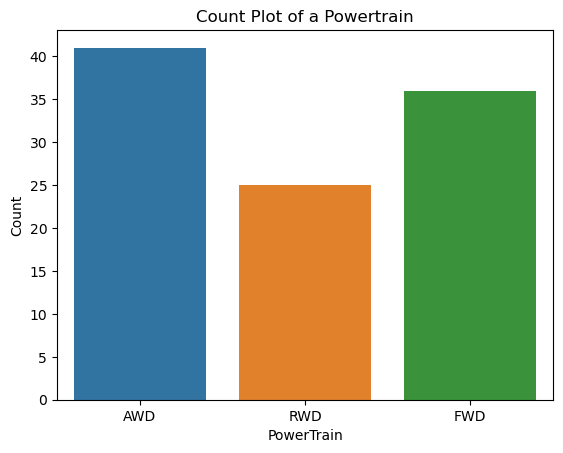

In [12]:
def train(dataframe):
    sns.countplot(x=dataframe['PowerTrain'])
    plt.title('Count Plot of a Powertrain')
    plt.xlabel('PowerTrain')
    plt.ylabel('Count')
    
train(electriccardataEV)

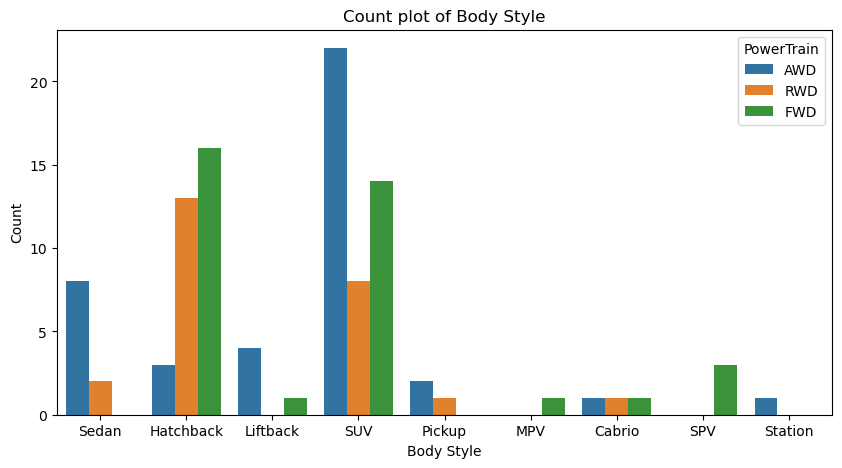

In [13]:
def bodystyle(dataframe):
    plt.figure(figsize=(10,5))
    sns.countplot(x='BodyStyle', data=dataframe, hue='PowerTrain')
    plt.title('Count plot of Body Style')
    plt.xlabel('Body Style')
    plt.ylabel('Count')
    plt.show()
    
bodystyle(electriccardataEV)

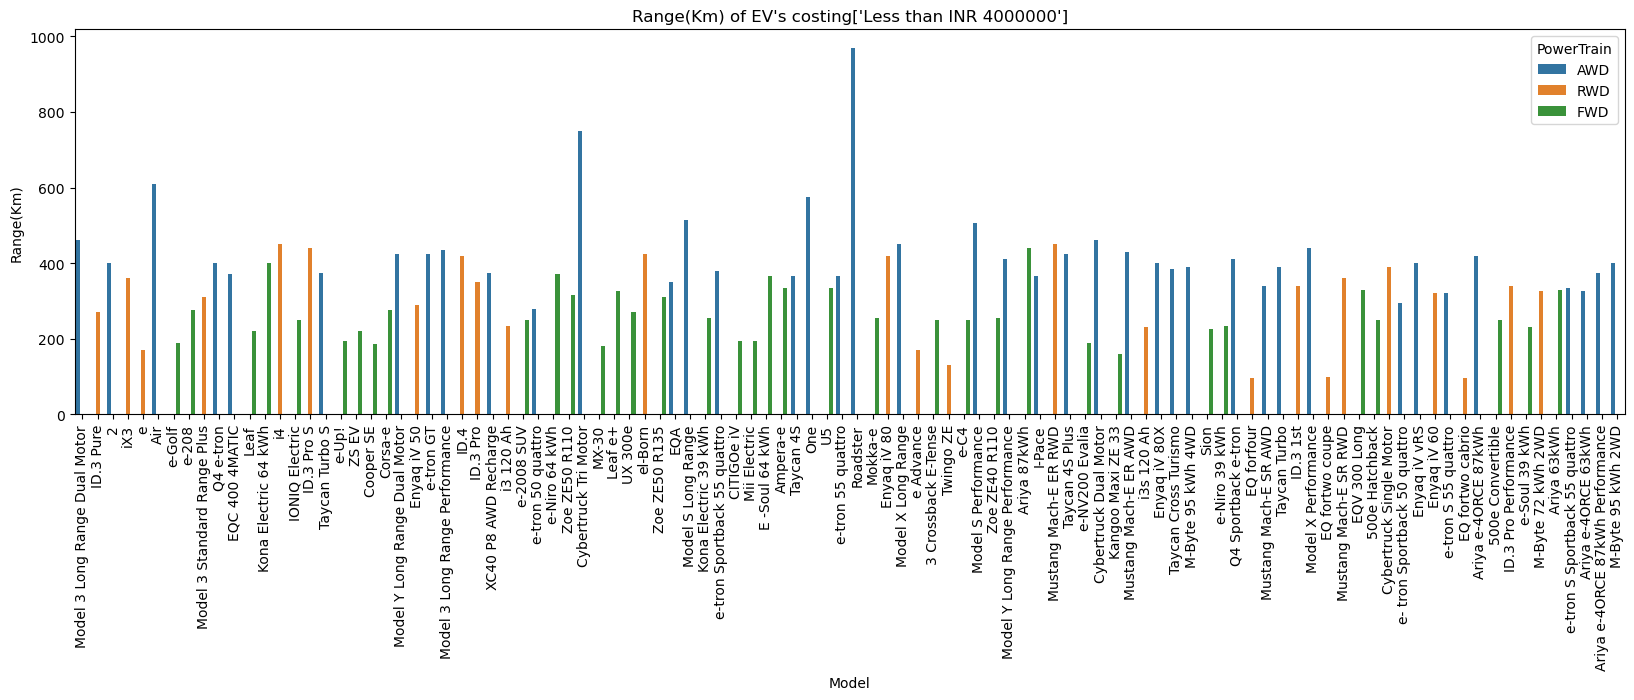

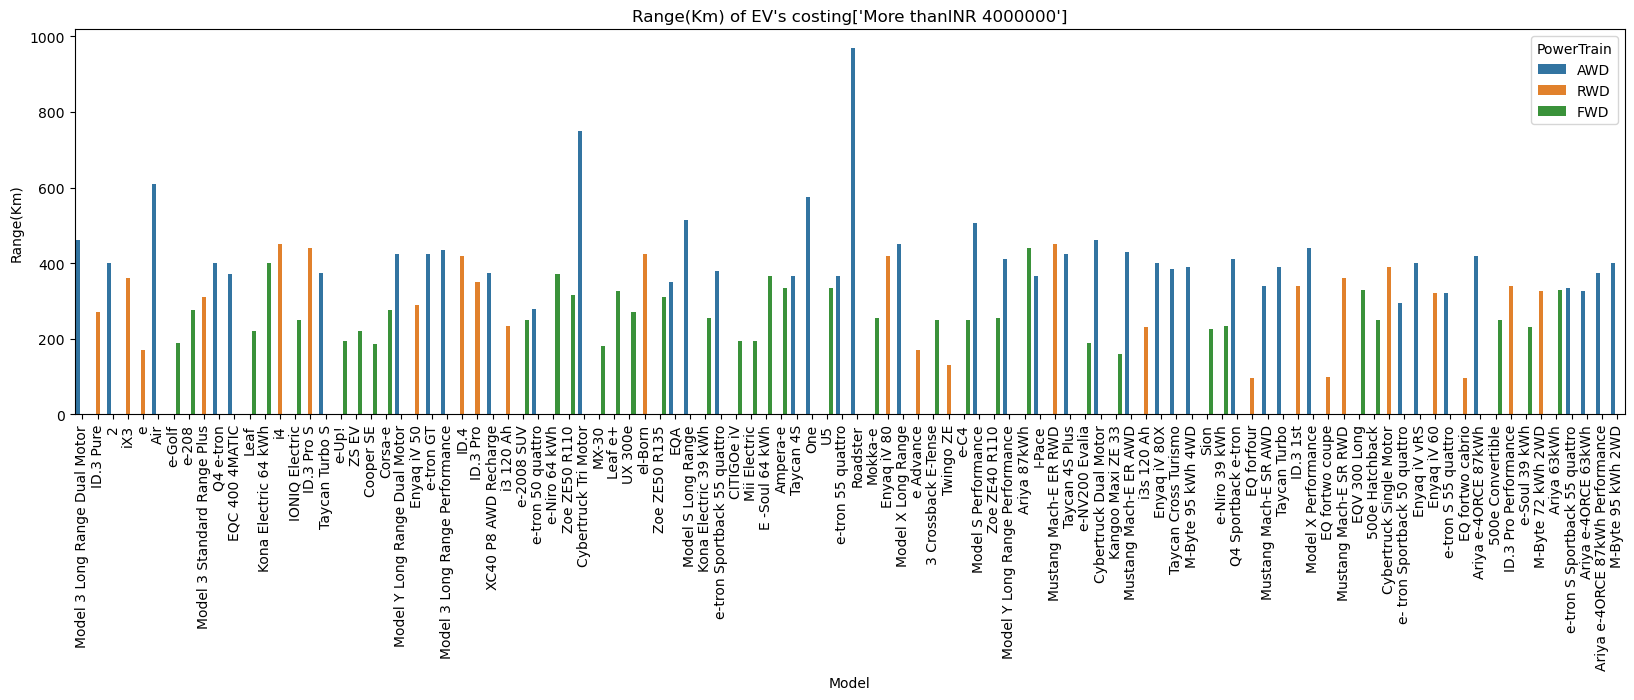

In [16]:
def range(dataframe, price):
    plt.figure(figsize=(20,5))

    sns.barplot(x='Model', y='Range_Km', data=electriccardataEV, hue=electriccardataEV['PowerTrain'])
    plt.title('''Range(Km) of EV's costing{}'''.format(price))
    plt.ylabel('Range(Km)')
    plt.xlabel('Model')
    plt.xticks(rotation = 90)
    plt.show()

range(electriccardataEV_1, t1)
range(electriccardataEV_2, t2)

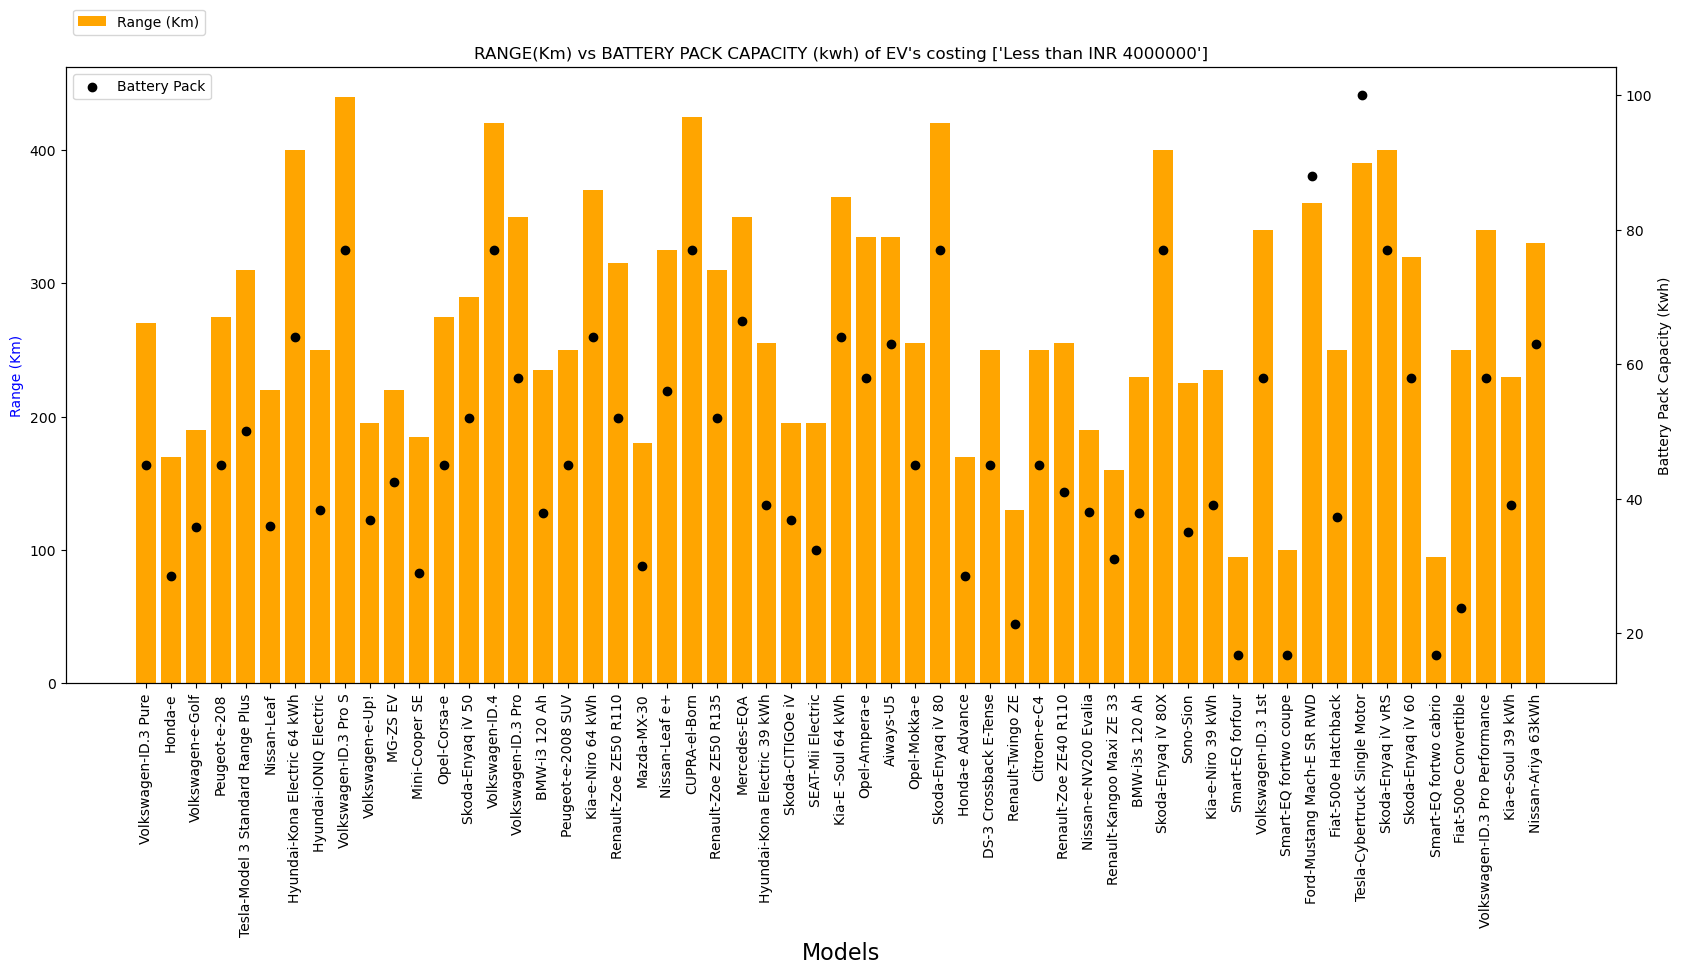

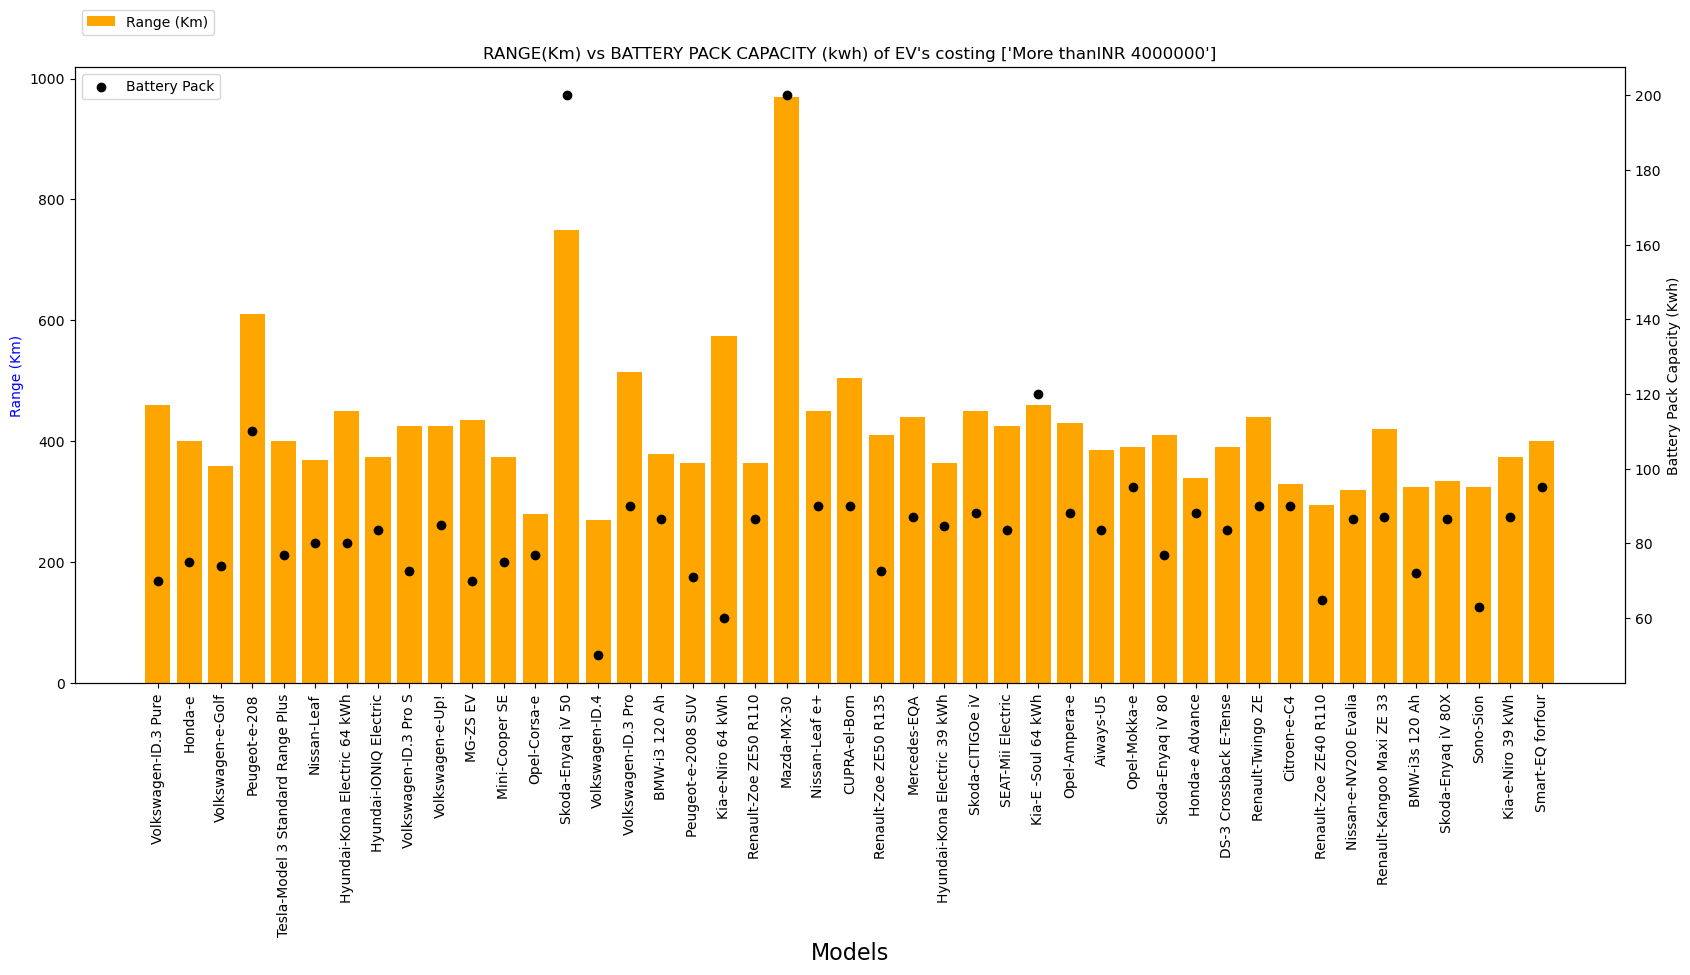

In [19]:
#range-batterypack
def range_batterypack(dataframe, text):
    fig = plt.figure(figsize=(20,8))
    a1= plt.subplot()
    a1.bar(dataframe["CarName"], dataframe["Range_Km"], label='Range (Km)', color='orange')
    plt.legend(loc= "upper left", bbox_to_anchor=(0,1.105))
    a2 = a1.twinx()
    a2.scatter(dataframe["CarName"], dataframe["Battery_Pack Kwh"], label= "Battery Pack", color= 'black')
    plt.title('''RANGE(Km) vs BATTERY PACK CAPACITY (kwh) of EV's costing {}'''.format(text), fontsize=12)
    a1.set_xlabel('Models', size= 16)
    a1.set_ylabel('Range (Km)', color = 'blue')
    a2.set_ylabel('Battery Pack Capacity (Kwh)', color='black')
    plt.legend(loc='upper left', bbox_to_anchor=(0,1))
    a1.set_xticklabels(electriccardataEV_1['CarName'], rotation = 'vertical')
    plt.show()
    
range_batterypack(electriccardataEV_1, t1)
range_batterypack(electriccardataEV_2, t2)

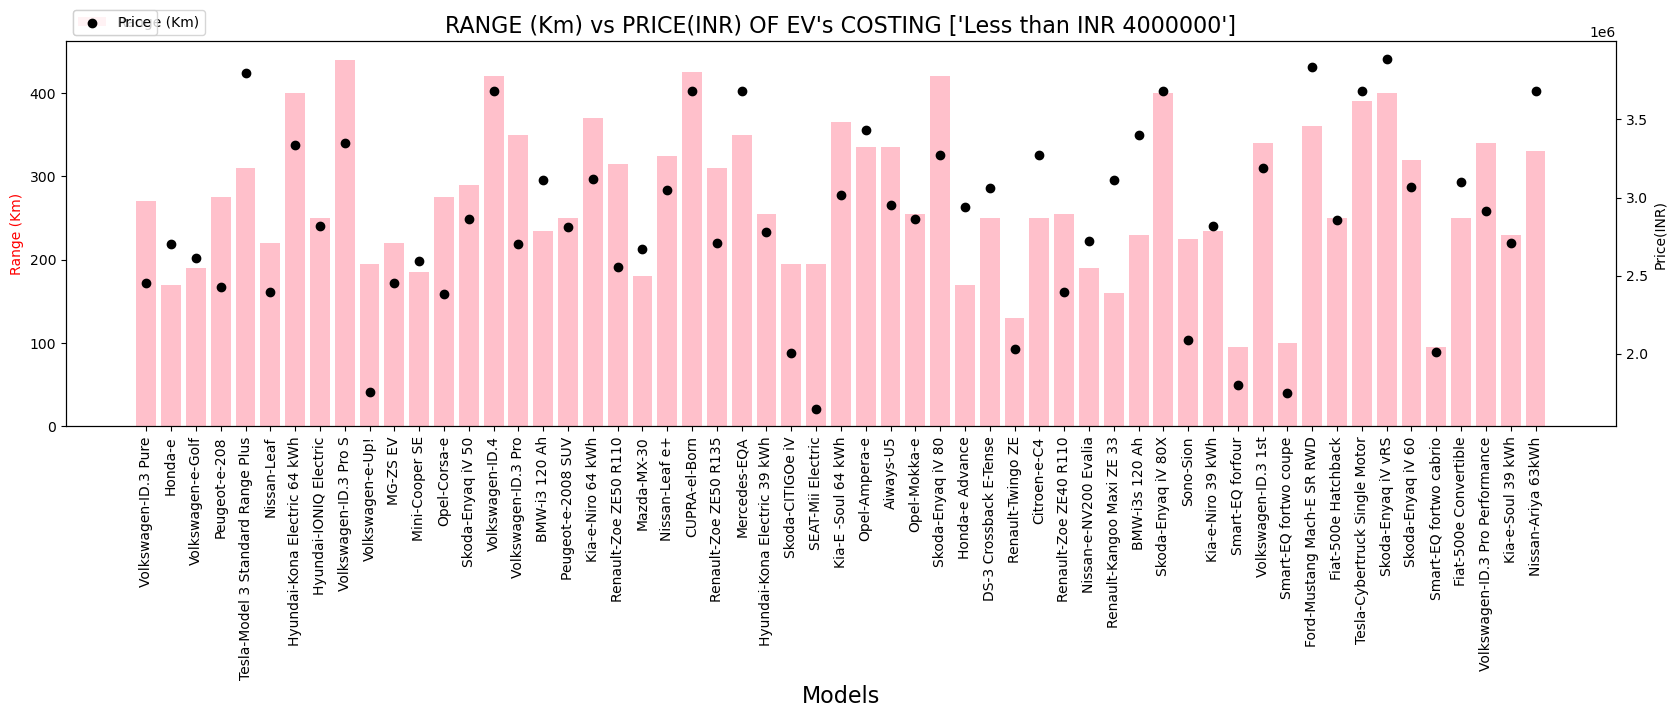

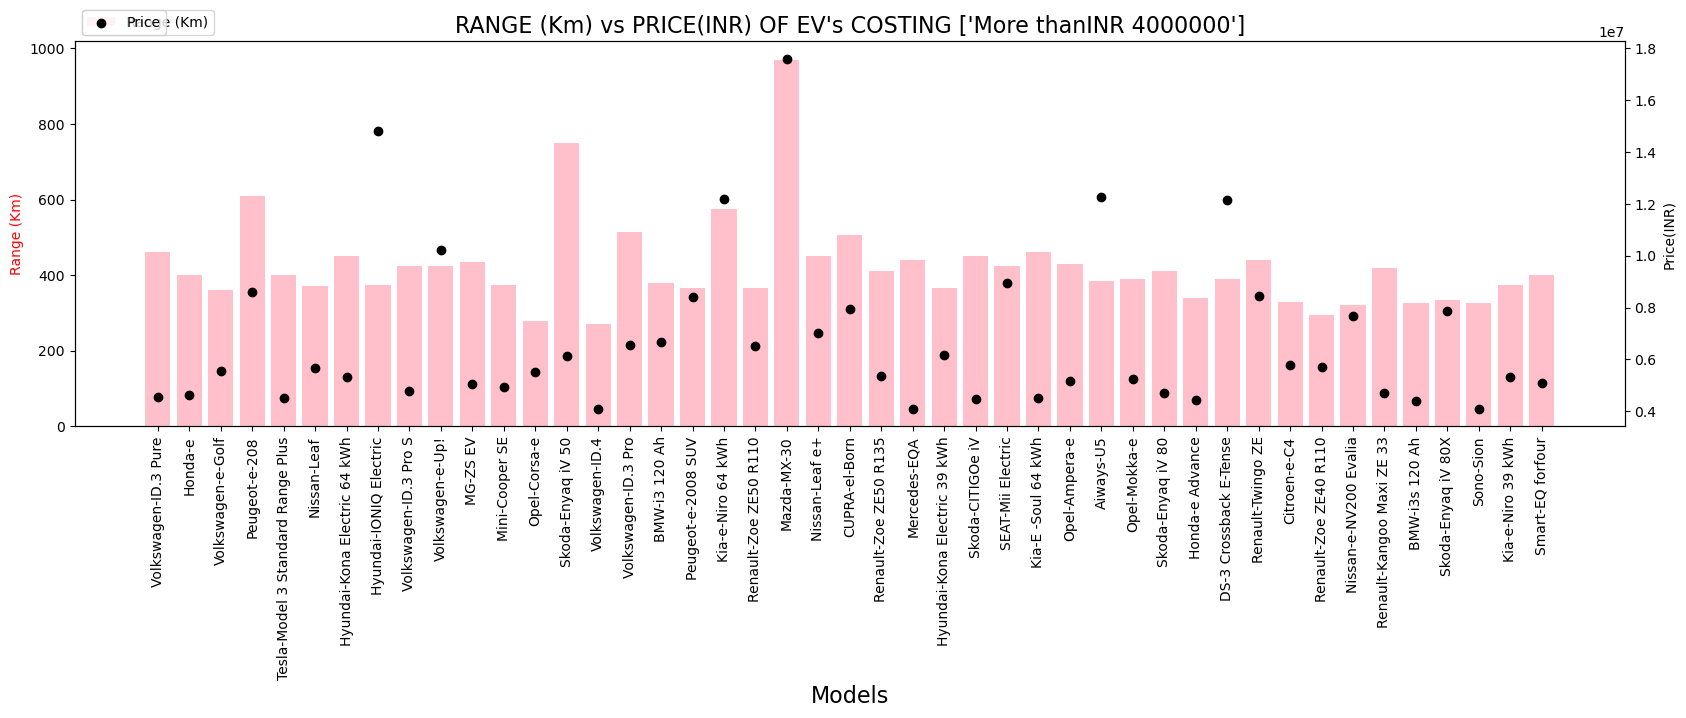

In [20]:
#Range - Price
def range_price(dataframe, text):
    fig = plt.figure(figsize=(20, 5))
    a1 = plt.subplot()
    a1.bar(dataframe['CarName'], dataframe['Range_Km'], label='Range (Km)', color='pink')
    plt.legend(loc='upper left', bbox_to_anchor = (0, 1.1))
    a2= a1.twinx()
    a2.scatter(dataframe['CarName'], dataframe['INR'], label = 'Price', color = 'black')
    plt.title('''RANGE (Km) vs PRICE(INR) OF EV's COSTING {}'''.format(text), fontsize=16)
    a1.set_xlabel('Models', size=16)
    a1.set_ylabel('Range (Km)', color = 'red')
    a2.set_ylabel('Price(INR)', color= 'black')
    plt.legend(loc = 'upper left', bbox_to_anchor = (0,1.1))
    a1.set_xticklabels(electriccardataEV_1['CarName'], rotation = 'vertical')
    plt.show()
    
range_price(electriccardataEV_1, t1)
range_price(electriccardataEV_2, t2)

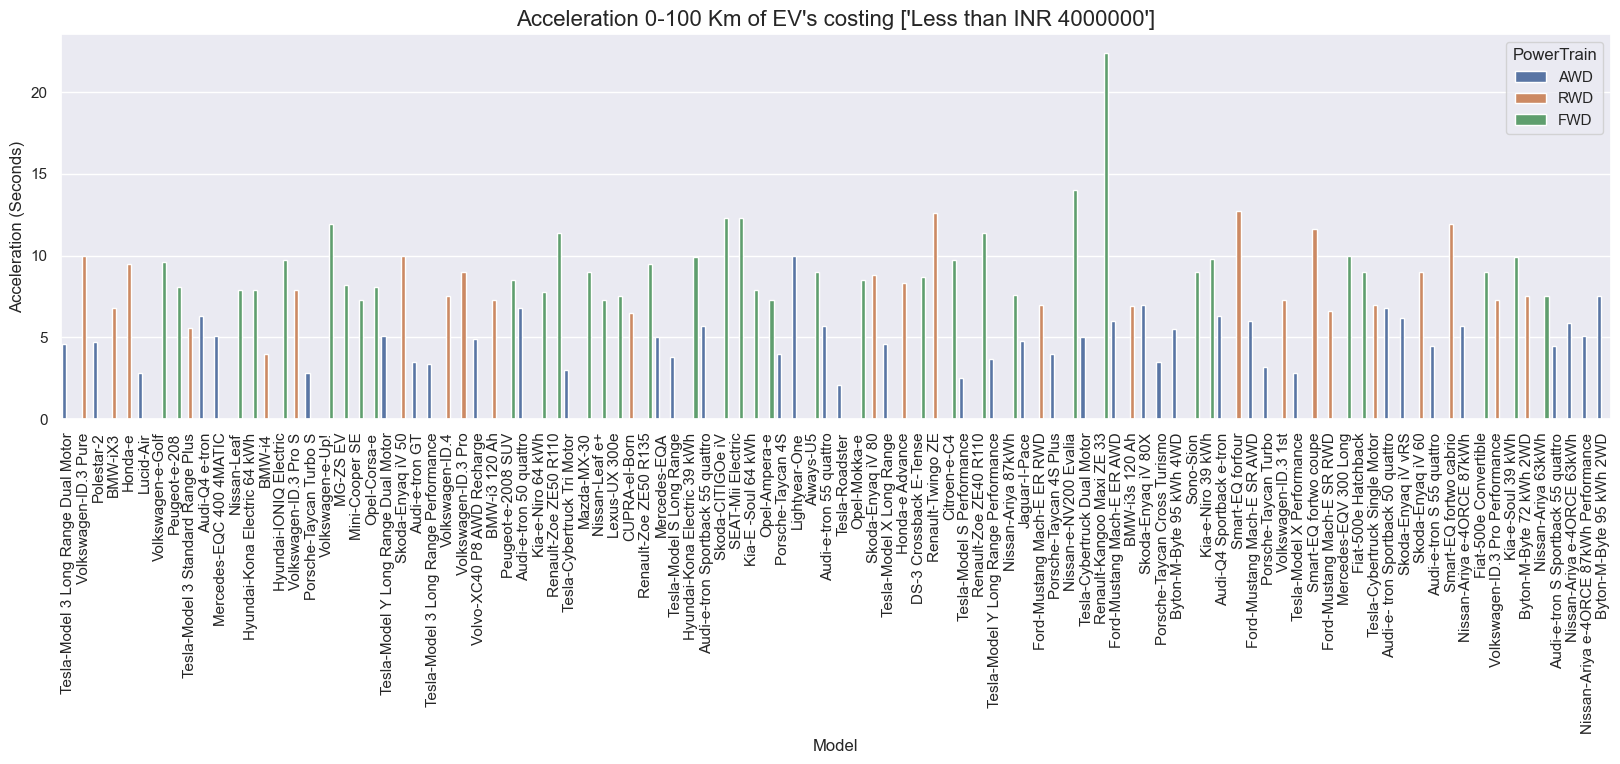

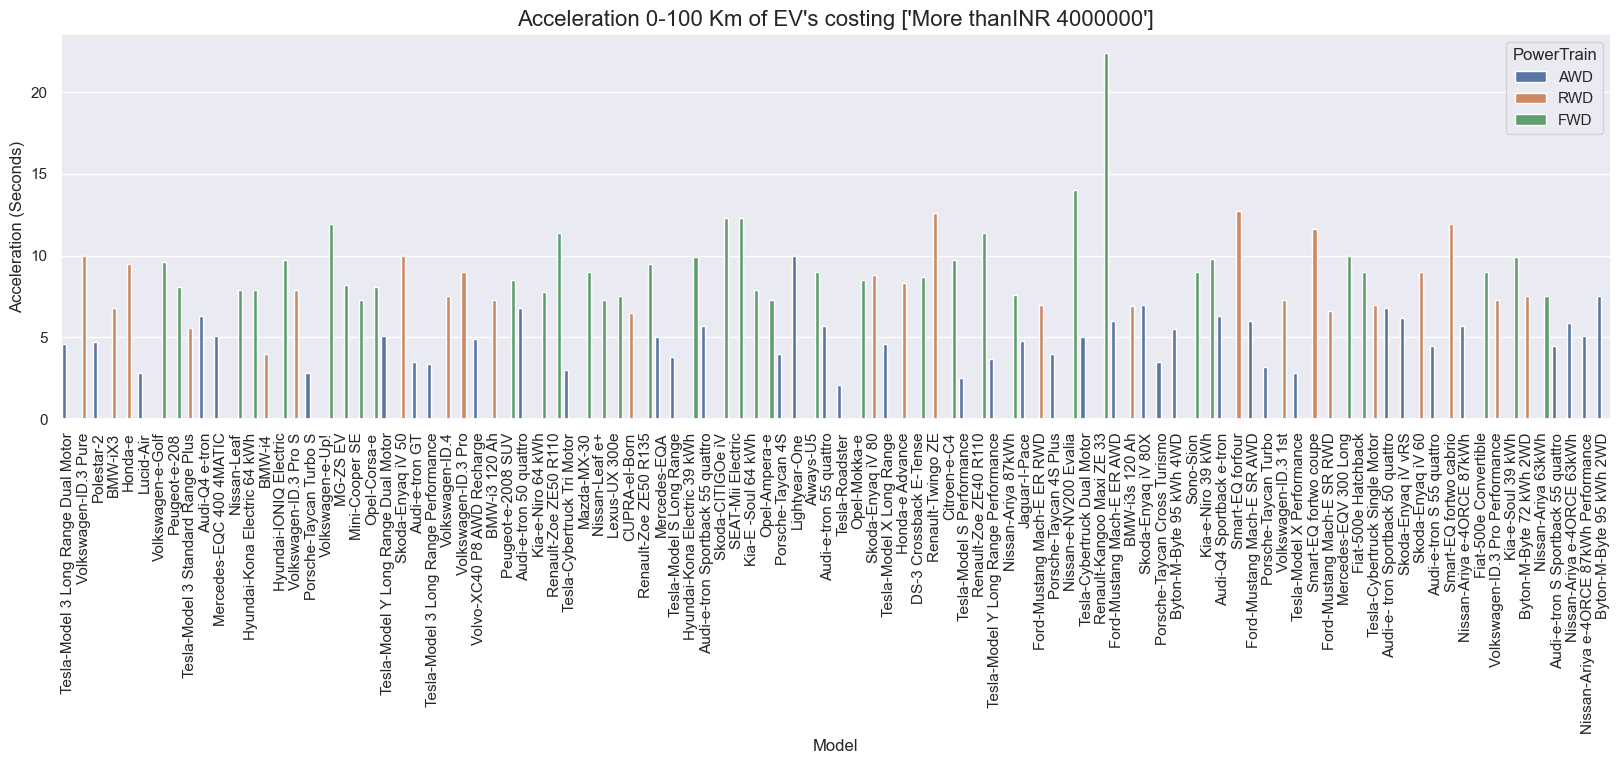

In [27]:
#Accelaration(0-100km/hr)
def acc(dataframe, text):
    plt.figure(figsize=(20,5))
    sns.set_theme(style="darkgrid")
    sns.barplot(x='CarName', y='AccelSec', data=electriccardataEV, hue=electriccardataEV['PowerTrain'])
    plt.title('''Acceleration 0-100 Km of EV's costing {}'''.format(text), fontsize=16)
    plt.ylabel('Acceleration (Seconds)')
    plt.xlabel('Model')
    plt.xticks(rotation = 90)
    plt.show()
acc(electriccardataEV_1, t1)
acc(electriccardataEV_2, t2)  

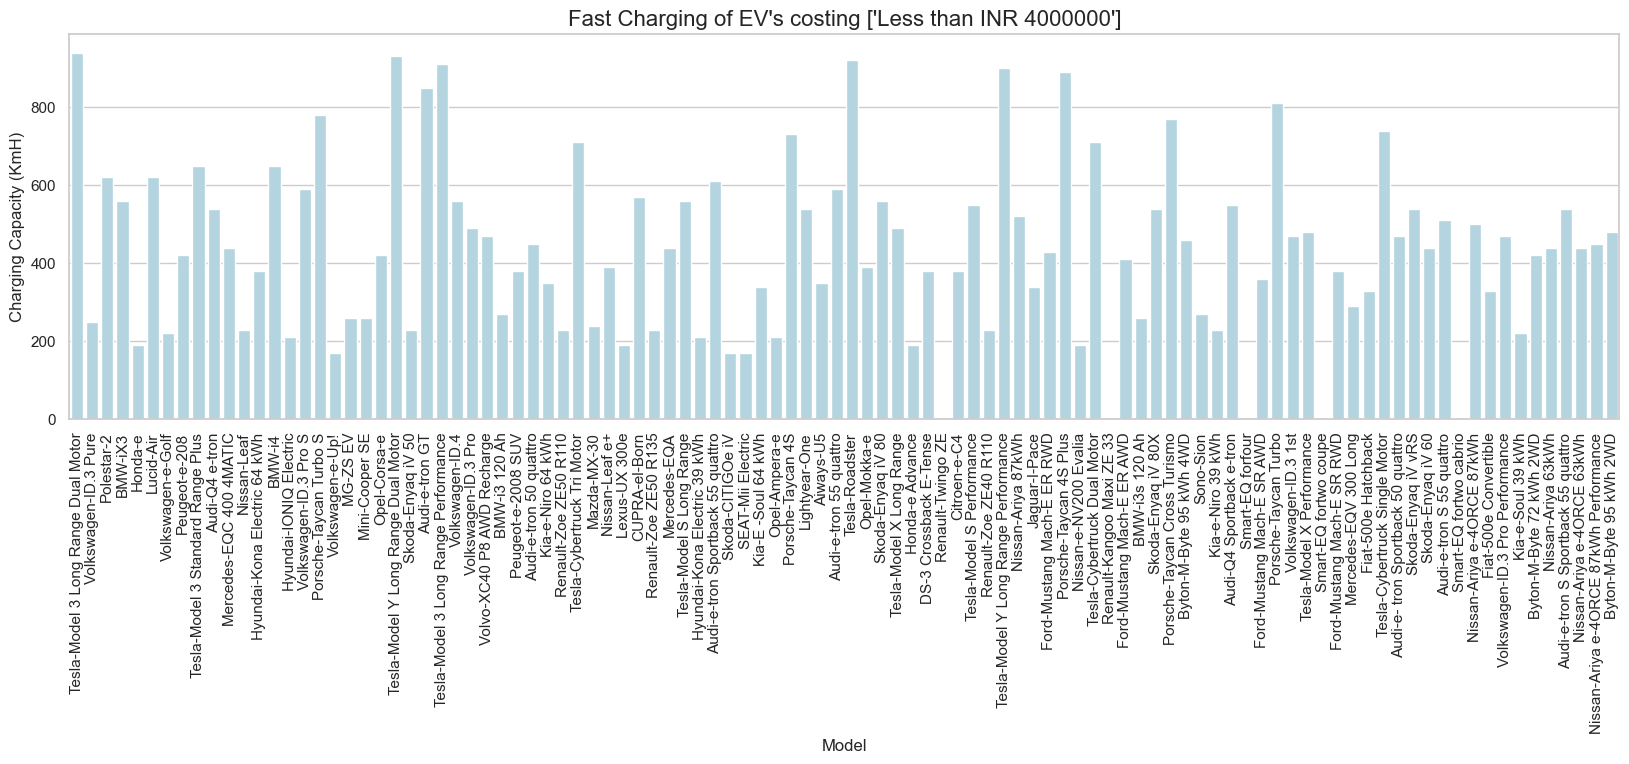

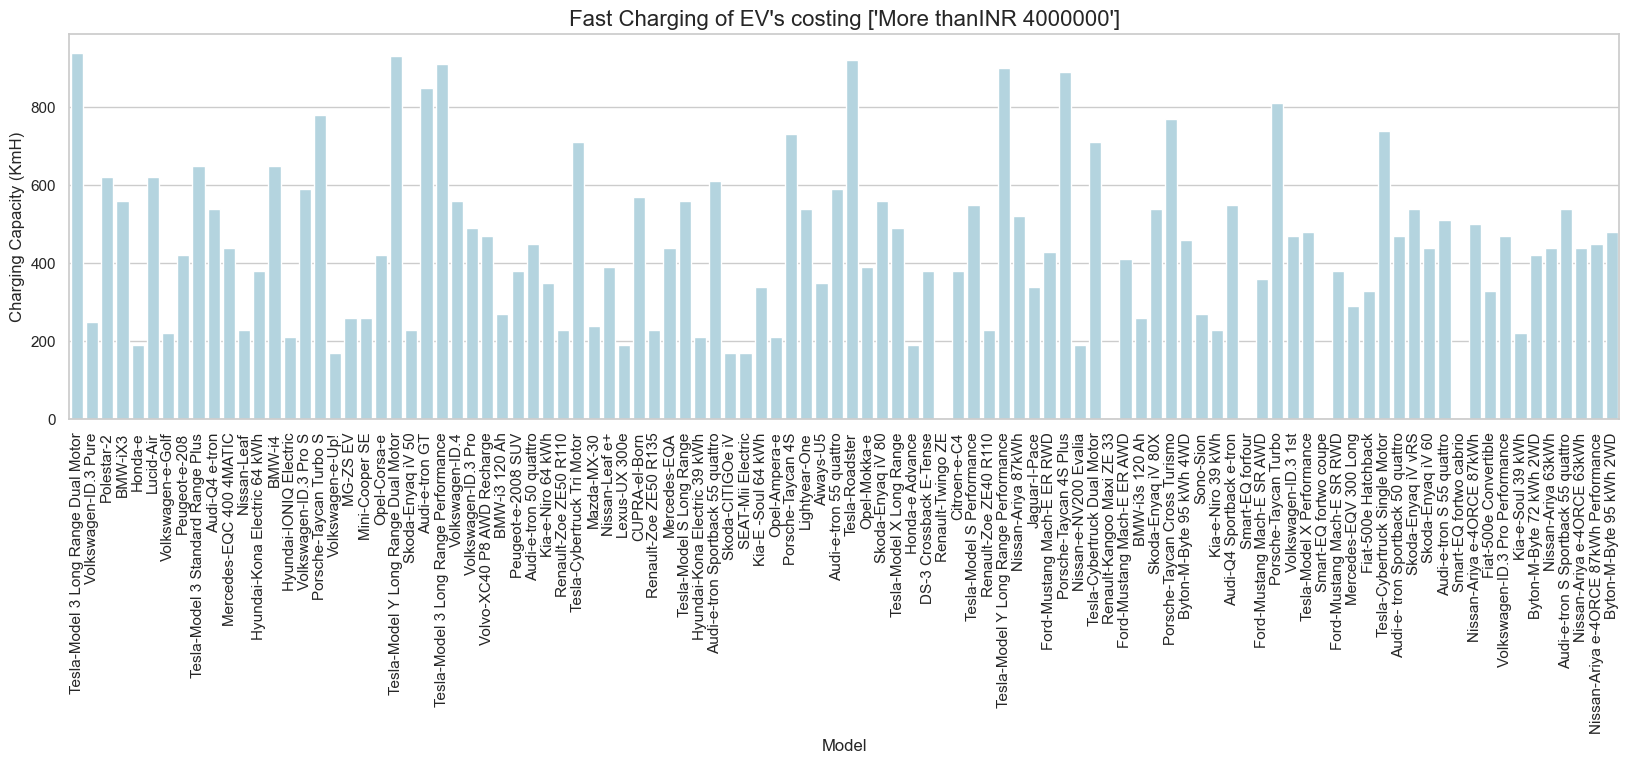

In [28]:
# Fast Charging data
def fastcharge(dataframe, price):
    plt.figure(figsize=(20, 5))
    sns.set_theme(style="whitegrid")
    sns.barplot(x='CarName', y='FastCharge_KmH', data=electriccardataEV, color = 'lightblue')
    plt.title('''Fast Charging of EV's costing {}'''.format(price), fontsize = 16)
    plt.ylabel('Charging Capacity (KmH)')
    plt.xlabel('Model')
    plt.xticks(rotation=90)
    plt.show()
    
fastcharge(electriccardataEV_1, t1)    
fastcharge(electriccardataEV_2, t2)    

In [38]:
fig = px.bar(electriccardataEV,x='Brand',y = 'TopSpeed_KmH',color = 'Brand',title = 'Which Car Has a Top speed?',labels = {'x':'Car Brands','y':'Top Speed Km/H'})
pio.show(fig)

In [39]:
fig = px.bar(electriccardataEV,x='AccelSec',y = 'Brand',color = 'Brand',title = 'Which car has fastest accelaration?',labels = {'x':'Accelaration','y':'Car Brands'})
pio.show(fig)

In [41]:
fig = px.bar(electriccardataEV,x = 'Range_Km',y = 'PowerTrain',color = 'PowerTrain',text='PowerTrain')
pio.show(fig)

In [43]:
fig = px.scatter_3d(electriccardataEV,x = 'Brand',y = 'Seats',z = 'Segment',color='Brand')
     

fig = px.scatter_3d(electriccardataEV,x = 'Brand',y = 'AccelSec',z = 'INR',color = 'Brand')
     

fig = px.box(electriccardataEV,x='RapidCharge',y = 'INR',color = 'RapidCharge',points='all')
pio.show(fig)

In [44]:
fig = px.scatter(electriccardataEV,x = 'Brand',y = 'Range_Km',size='Seats',color = 'Brand',hover_data=['RapidCharge','INR'])
pio.show(fig)

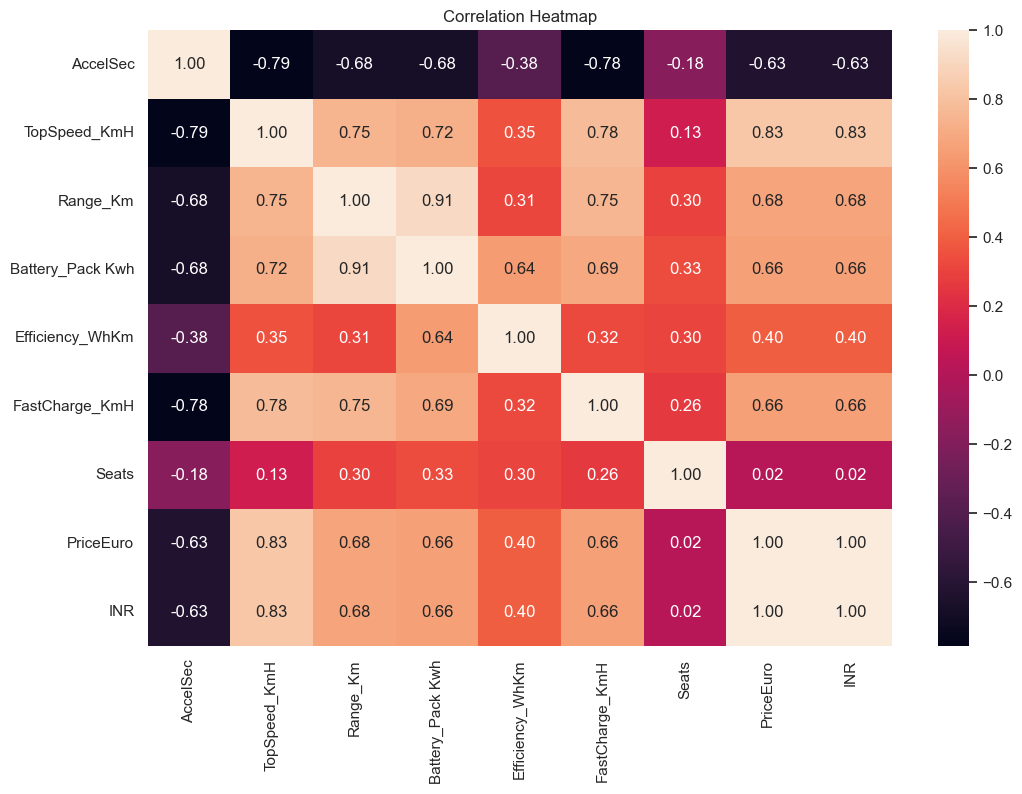

In [34]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(electriccardataEV.corr(), annot=True, fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [31]:
#Vehicles to buy under INR 40,00000 with max range(Km)

pd.set_option('display.max_columns', None)
top_range_1 = electriccardataEV_1.sort_values(by= 'Range_Km', ascending= False)
print(top_range_1[['CarName', 'Range_Km', 'Battery_Pack Kwh', 'INR', 'RapidCharge']])

                              CarName  Range_Km  Battery_Pack Kwh  \
15              Volkswagen-ID.3 Pro S       440              77.0   
37                      CUPRA-el-Born       425              77.0   
53                  Skoda-Enyaq iV 80       420              77.0   
25                    Volkswagen-ID.4       420              77.0   
88                 Skoda-Enyaq iV vRS       400              77.0   
12       Hyundai-Kona Electric 64 kWh       400              64.0   
71                 Skoda-Enyaq iV 80X       400              77.0   
86      Tesla-Cybertruck Single Motor       390             100.0   
31                  Kia-e-Niro 64 kWh       370              64.0   
45                 Kia-E -Soul 64 kWh       365              64.0   
83         Ford-Mustang Mach-E SR RWD       360              88.0   
39                       Mercedes-EQA       350              66.5   
26                Volkswagen-ID.3 Pro       350              58.0   
94    Volkswagen-ID.3 Pro Performa

In [32]:
#Vehicles with best Acceleration under INR 40,00000
pd.set_option('display.max_columns', None)
acceleration_1 = electriccardataEV_1.sort_values(by= 'AccelSec')
print(acceleration_1[['CarName', 'AccelSec', 'Range_Km', 'PowerTrain', 'Battery_Pack Kwh', 'INR']])

                              CarName  AccelSec  Range_Km PowerTrain  \
39                       Mercedes-EQA       5.0       350        AWD   
8   Tesla-Model 3 Standard Range Plus       5.6       310        RWD   
88                 Skoda-Enyaq iV vRS       6.2       400        AWD   
37                      CUPRA-el-Born       6.5       425        RWD   
83         Ford-Mustang Mach-E SR RWD       6.6       360        RWD   
70                     BMW-i3s 120 Ah       6.9       230        RWD   
86      Tesla-Cybertruck Single Motor       7.0       390        RWD   
71                 Skoda-Enyaq iV 80X       7.0       400        AWD   
35                     Nissan-Leaf e+       7.3       325        FWD   
19                     Mini-Cooper SE       7.3       185        FWD   
28                      BMW-i3 120 Ah       7.3       235        RWD   
80                Volkswagen-ID.3 1st       7.3       340        RWD   
94    Volkswagen-ID.3 Pro Performance       7.3       340       

In [33]:
#Vehicles with Maximum Efficiency
pd.set_option('display.max_columns', None)
efficiency = electriccardataEV.sort_values(by = 'Efficiency_WhKm')
print(efficiency[['CarName', 'Efficiency_WhKm', 'Range_Km', 'PowerTrain', 'Battery_Pack Kwh', 'INR']])

                               CarName  Efficiency_WhKm  Range_Km PowerTrain  \
48                       Lightyear-One              104       575        AWD   
14              Hyundai-IONIQ Electric              153       250        FWD   
8    Tesla-Model 3 Standard Range Plus              153       310        RWD   
41        Hyundai-Kona Electric 39 kWh              154       255        FWD   
74                           Sono-Sion              156       225        FWD   
..                                 ...              ...       ...        ...   
98  Audi-e-tron S Sportback 55 quattro              258       335        AWD   
67         Tesla-Cybertruck Dual Motor              261       460        AWD   
33          Tesla-Cybertruck Tri Motor              267       750        AWD   
90            Audi-e-tron S 55 quattro              270       320        AWD   
84               Mercedes-EQV 300 Long              273       330        FWD   

    Battery_Pack Kwh           INR  
48

Text(0.5, 1.0, 'Plug Type')

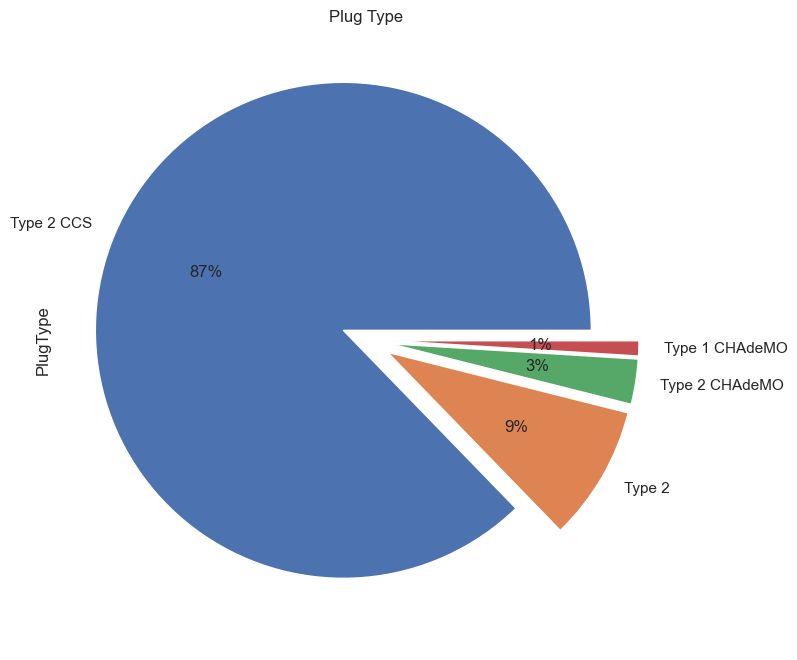

In [45]:
electriccardataEV['PlugType'].value_counts().plot.pie(figsize=(8,15),autopct='%.0f%%',explode=(.1,.1,.1,.1))
plt.title('Plug Type')

Text(0.5, 1.0, 'Body Style')

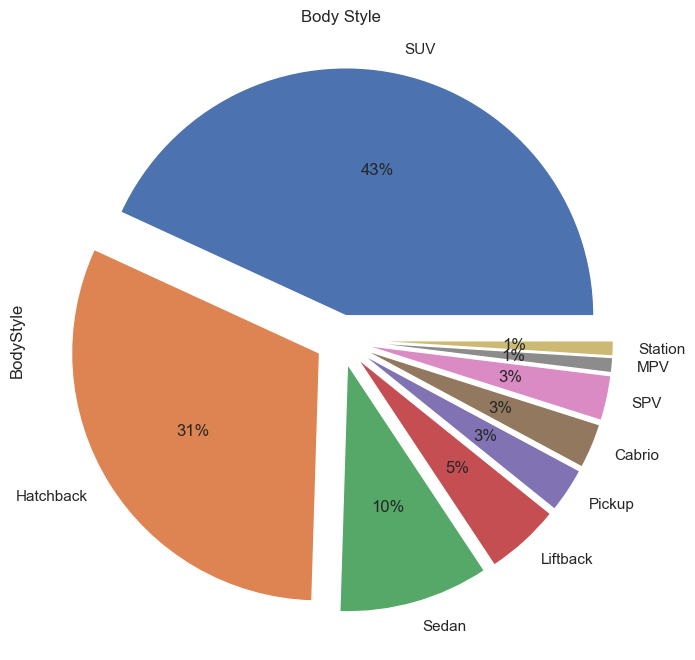

In [46]:
electriccardataEV['BodyStyle'].value_counts().plot.pie(figsize=(8,15),autopct='%.0f%%',explode=(0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1))
plt.title('Body Style')

Text(0.5, 1.0, 'Segment')

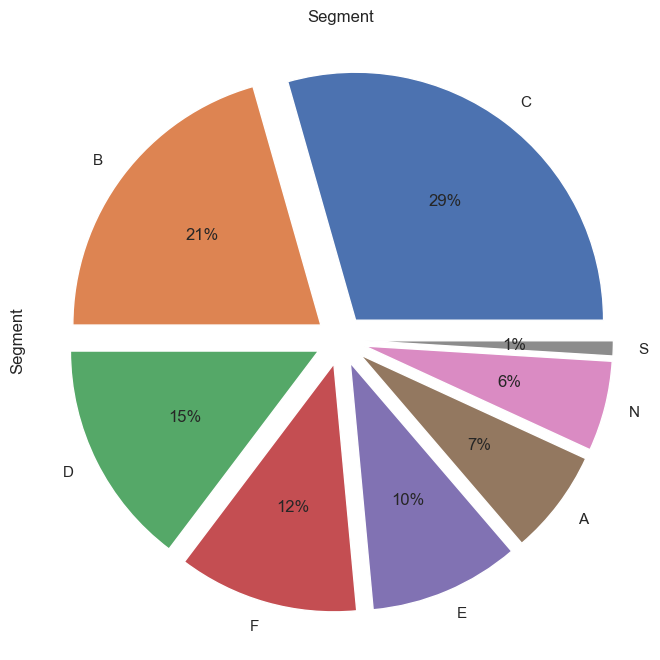

In [47]:
electriccardataEV['Segment'].value_counts().plot.pie(figsize=(8,15),autopct='%.0f%%',explode=(0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1))
plt.title('Segment')

Text(0.5, 1.0, 'Seats')

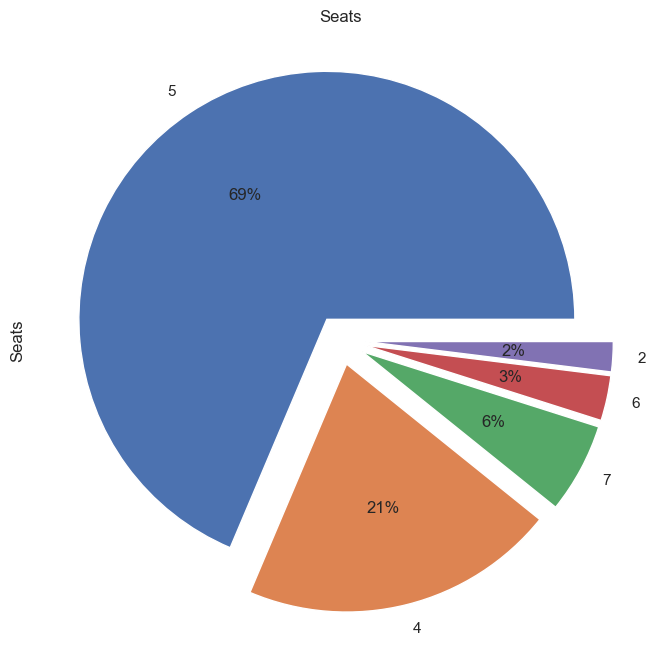

In [48]:
electriccardataEV['Seats'].value_counts().plot.pie(figsize=(8,15),autopct='%.0f%%',explode=(0.1,0.1,0.1,0.1,0.1))
plt.title('Seats')

In [53]:
electriccardataEV['RapidCharge'].replace(to_replace=['No','Yes'],value=[0, 1],inplace=True)
electriccardataEV['PowerTrain'].replace(to_replace=['RWD','AWD','FWD'],value=[0, 2,1],inplace=True)
x=electriccardataEV[['AccelSec','Range_Km','TopSpeed_KmH','Efficiency_WhKm', 'RapidCharge','PowerTrain']]
y=electriccardataEV['PriceEuro']

In [54]:
x= sm.add_constant(x)
results = sm.OLS(y,x)

In [55]:
model=results.fit()
model.summary()
     

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              PriceEuro   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.703
Method:                 Least Squares   F-statistic:                     40.91
Date:                Wed, 08 May 2024   Prob (F-statistic):           2.96e-24
Time:                        19:49:58   Log-Likelihood:                -1144.2
No. Observations:                 102   AIC:                             2302.
Df Residuals:                      95   BIC:                             2321.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -9.541e+04   3.05e+04     -3.124      0.002   -1.56e+05   -3.48e+04
AccelSec         1540.5319   1194.376      1.290      0.200    -830.604    3911.668
Range_Km           38.9549     23.485      1.659      0.100      -7.669      85.578
TopSpeed_KmH      569.7097     87.081      6.542      0.000     396.833     742.587
Efficiency_WhKm   110.5243     70.541      1.567      0.120     -29.518     250.566
RapidCharge     -2690.7738   1.09e+04     -0.246      0.806   -2.44e+04     1.9e+04
PowerTrain       5454.2164   2965.359      1.839      0.069    -432.765    1.13e+04
==============================================================================
Omnibus:                       82.847   Durbin-Watson:                   2.075
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              697.105
Skew:                           2.598   Prob(JB):                    4.22e-152
Kurtosis:                      14.706   Cond. No.                     7.56e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.56e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [56]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=365)

In [57]:
lr= LinearRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)

In [58]:
#Finding out the R-squared value

r2=(r2_score(y_test,pred))
print(r2*100)
     

79.66245261701745


Around 79.66% of the dependant variable has been explained by the independant variables

In [59]:

y1=electriccardataEV[['RapidCharge']]
x1=electriccardataEV[['PriceEuro']]
X1_train, X1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.2,random_state=365)
log= LogisticRegression()
log.fit(X1_train, y1_train)
pred1 = log.predict(X1_test)
pred1

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int64)

In [60]:
#Confusion Matrix of the regression

cm = confusion_matrix(y1_test, pred1)
cm

array([[ 0,  2],
       [ 0, 19]], dtype=int64)

<Axes: xlabel='TopSpeed_KmH', ylabel='FastCharge_KmH'>

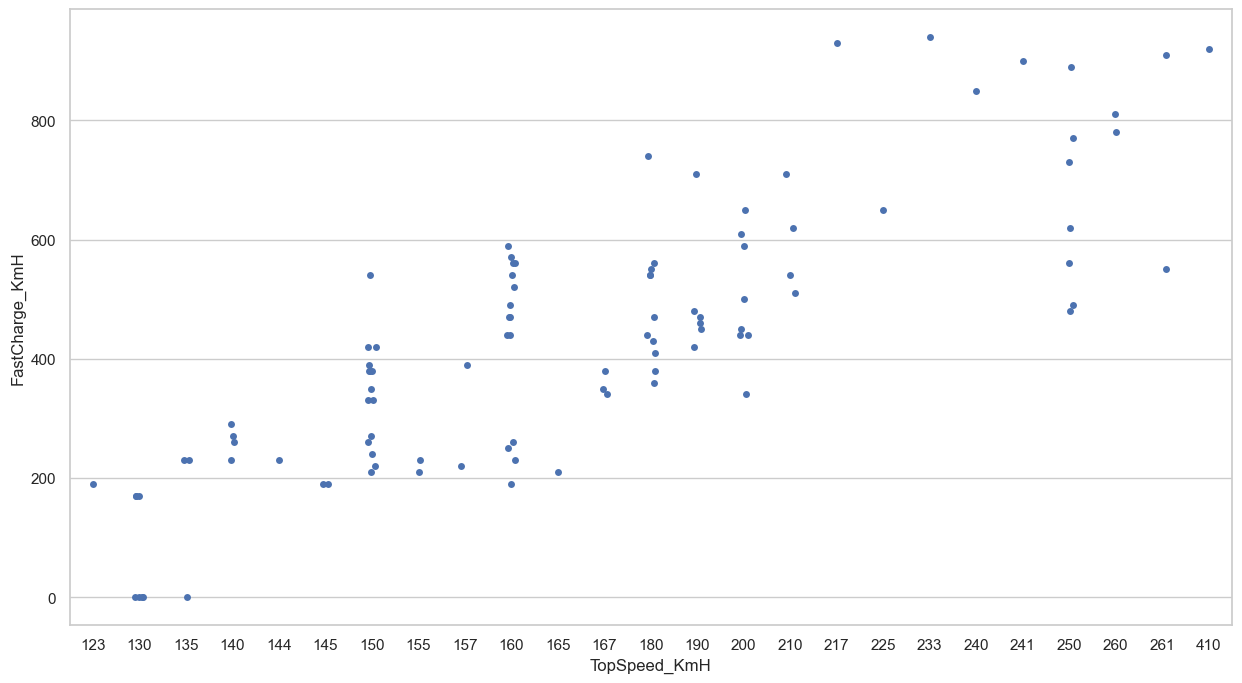

In [61]:
#Clustering

ax=plt.subplots(figsize=(15,8))
sns.stripplot(x='TopSpeed_KmH', y='FastCharge_KmH', data=electriccardataEV, jitter=True)
     

<Axes: xlabel='TopSpeed_KmH', ylabel='Efficiency_WhKm'>

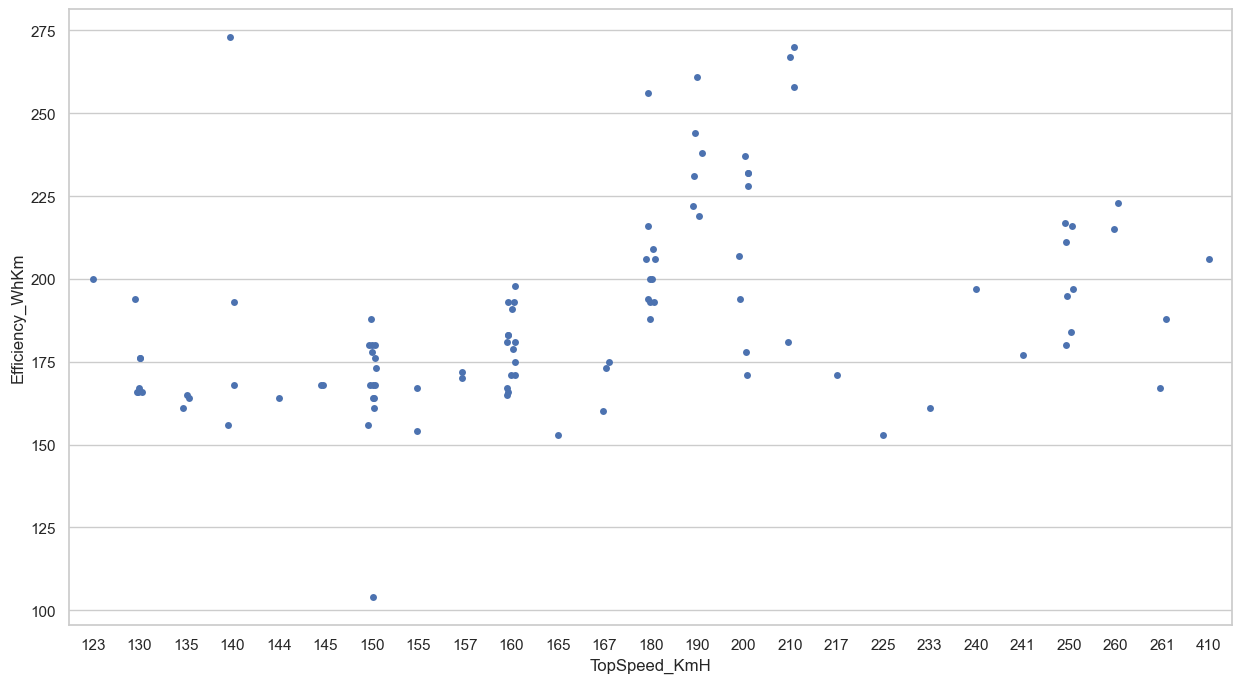

In [62]:
ax=plt.subplots(figsize=(15,8))
sns.stripplot(x='TopSpeed_KmH', y='Efficiency_WhKm', data=electriccardataEV, jitter=True)

In [63]:
features = ['AccelSec','TopSpeed_KmH','Efficiency_WhKm','FastCharge_KmH', 'RapidCharge','Range_Km', 'Seats', 'INR','PowerTrain']
# Separating out the features
x = electriccardataEV.loc[:, features].values
x = StandardScaler().fit_transform(x)

In [64]:
pca = PCA(n_components=9)
t = pca.fit_transform(x)
data2 = pd.DataFrame(t, columns=['PC1', 'PC2','PC3','PC4','Pc5','PC6', 'PC7', 'PC8','PC9'])
data2

PC1     PC2     PC3     PC4     Pc5     PC6     PC7     PC8     PC9
0    2.3420  0.2549 -1.2970 -0.5696  0.7710 -1.3043  0.4018 -0.7626 -0.3549
1   -1.9146 -0.5690 -0.7090  0.5939  0.2070  0.3530 -0.3971  0.2389 -0.3253
2    1.5157  0.0244 -0.3821 -0.6797  0.1075 -0.7291  0.2669  0.0423 -0.0874
3    0.2524 -0.1044 -0.2570  1.6010 -0.1420  0.1907 -0.4129 -0.3017  0.1856
4   -2.5614  0.2540 -0.7915  0.3226 -0.8931  0.3483 -0.4951  0.1097 -0.1660
..      ...     ...     ...     ...     ...     ...     ...     ...     ...
97  -0.3056 -0.4604 -0.0758  0.1643 -0.1637 -0.0418  0.1517 -0.1266  0.1330
98   2.2318  0.1775  1.7928  0.1589 -1.1203  0.0772 -0.3420 -0.0919  0.1015
99   0.7390 -0.1817  0.2770 -0.8116 -0.2870 -0.4483  0.0564  0.2863 -0.2655
100  1.4763 -0.1292  1.1513 -0.1793 -0.7196 -0.1189  0.2692  0.3101 -0.1019
101  1.2125 -0.2583  1.3901 -0.0942 -0.4822  0.2629  0.5891 -0.2066 -0.3675

[102 rows x 9 columns]

In [66]:
df_9=data2.iloc[:,:9]
df_9.head()

PC1     PC2     PC3     PC4     Pc5     PC6     PC7     PC8     PC9
0  2.3420  0.2549 -1.2970 -0.5696  0.7710 -1.3043  0.4018 -0.7626 -0.3549
1 -1.9146 -0.5690 -0.7090  0.5939  0.2070  0.3530 -0.3971  0.2389 -0.3253
2  1.5157  0.0244 -0.3821 -0.6797  0.1075 -0.7291  0.2669  0.0423 -0.0874
3  0.2524 -0.1044 -0.2570  1.6010 -0.1420  0.1907 -0.4129 -0.3017  0.1856
4 -2.5614  0.2540 -0.7915  0.3226 -0.8931  0.3483 -0.4951  0.1097 -0.1660

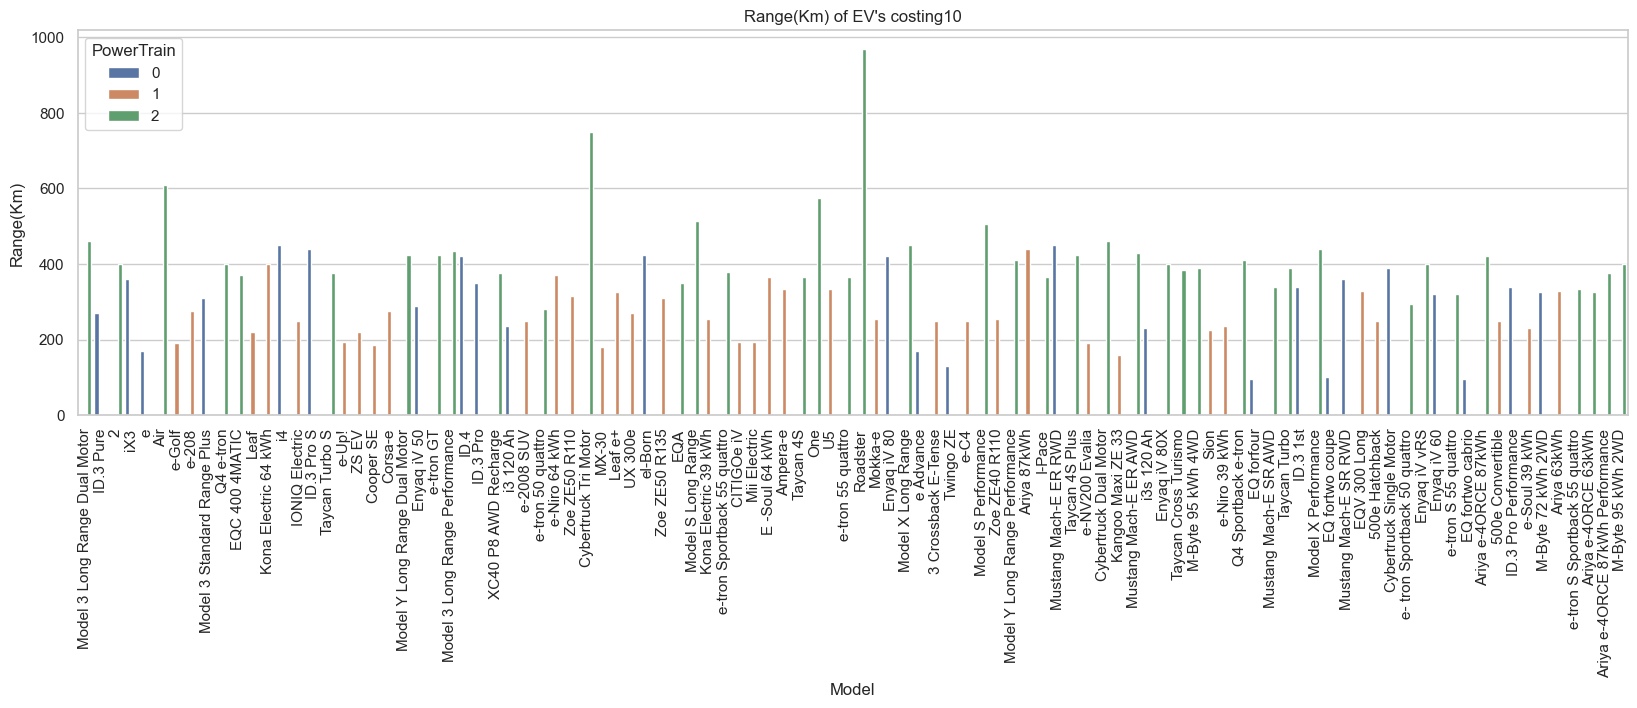

TypeError: 'NoneType' object is not iterable

In [68]:
# correlation coefficient between original variables and the component
loadings = pca.components_
num_pc = pca.n_features_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['variable'] = df_9.columns.values
loadings_df = loadings_df.set_index('variable')
loadings_df

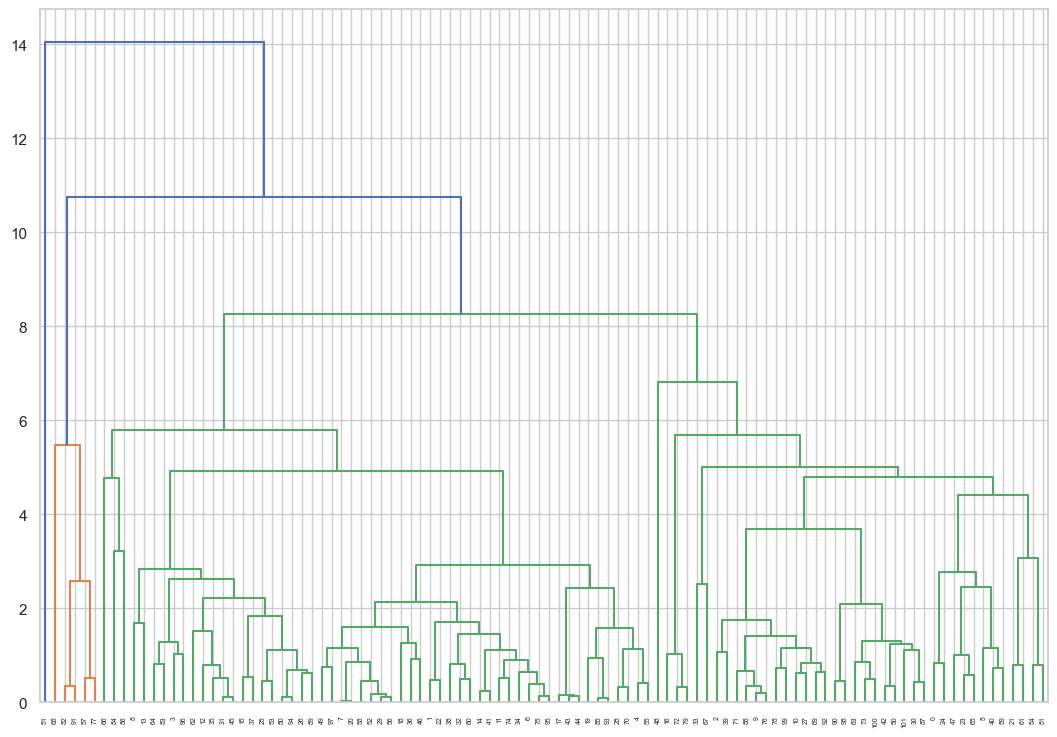

In [69]:
linked = linkage(data2, 'complete')
plt.figure(figsize=(13, 9))
dendrogram(linked, orientation='top')
plt.show()

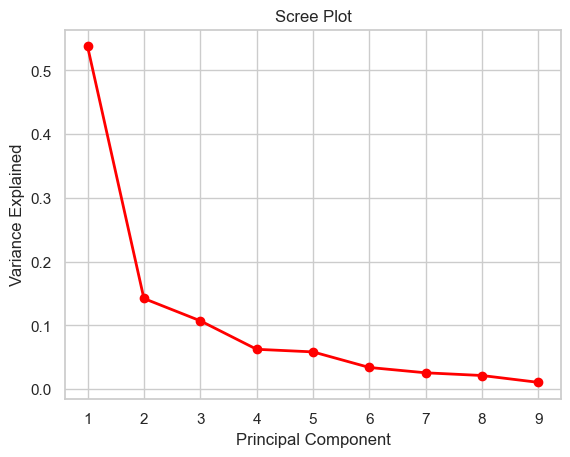

In [70]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='red')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [ ]:
model = KMeans(random_state=40)
visualizer = KElbowVisualizer(model, k=(2,9), metric='distortion', timings=True)
visualizer.fit(t)      
visualizer.show()        

In [ ]:
model = KMeans(random_state=40)
visualizer = KElbowVisualizer(model, k=(2,9), metric='calinski_harabasz', timings=True)
visualizer.fit(t)        # Fit the data to the visualizer
visualizer.show()  

In [ ]:
#K-means clustering 

kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0).fit(t)
df['cluster_num'] = kmeans.labels_ #adding to df
print (kmeans.labels_) #Label assigned for each data point
print (kmeans.inertia_) #gives within-cluster sum of squares. 
print(kmeans.n_iter_) #number of iterations that k-means algorithm runs to get a minimum within-cluster sum of squares
print(kmeans.cluster_centers_) #Location of the centroids on each cluster.
     

In [ ]:
#To see each cluster size

Counter(kmeans.labels_)
     

In [ ]:
#Visulazing clusters
sb.scatterplot(data=data2, x="PC1", y="PC9", hue=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 
            marker="X", c="r", s=80, label="centroids")
plt.legend()
plt.show()

In [ ]:
X=data2[['PC1', 'PC2','PC3','PC4','Pc5','PC6', 'PC7','PC8','PC9']]
y=df['INR']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.4, random_state=101)
lm=LinearRegression().fit(X_train,y_train) 
print(lm.intercept_)

In [ ]:
lm.coef_

In [ ]:
X_train.columns

In [ ]:
cdf=pd.DataFrame(lm.coef_, X.columns, columns=['Coeff'])
cdf

In [ ]:
predictions=lm.predict(X_test)
predictions

In [ ]:
y_test
     

In [ ]:
plt.scatter(y_test, predictions)

In [ ]:
#Residual histogram plot
sb.distplot((y_test-predictions))

In [ ]:
print('MAE:',metrics.mean_absolute_error(y_test,predictions))
print('MSE:',metrics.mean_squared_error(y_test,predictions))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,predictions)))

In [ ]:
metrics.mean_absolute_error(y_test,predictions)
     

In [ ]:
metrics.mean_squared_error(y_test,predictions)
     

In [ ]:
np.sqrt(metrics.mean_squared_error(y_test,predictions))
     